# 1. Import Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np



# Read in the data

df = pd.read_csv(r'C:\Users\hp\Documents\Data-Analytics\Project_portfolio\Python_data\Womens_Clothing_E-Commerce_Reviews.csv', low_memory=False)

In [81]:
# Viewing the data

df.head()

,Unnamed: 0,Age,Review Text,Rating,Division Name,Department Name,Class Name,Review Length,Age Group,Sentiment,Sentiment Category
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates,53,25-35,0.633333,Positive
1,1,34,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses,303,25-35,0.339583,Positive
2,2,60,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses,500,55+,0.073675,Positive
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants,124,45-55,0.550000,Positive
4,4,47,This shirt is very flattering to all due to th...,5,General,Tops,Blouses,192,45-55,0.512891,Positive


In [6]:
# Check columns data types

df.dtypes

Unnamed: 0          int64
Age                 int64
Review Text        object
Rating              int64
Division Name      object
Department Name    object
Class Name         object
dtype: object

In [11]:
# Check missing columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    pct_missing = round(pct_missing, 3)

    #print('() - ()%'.format(col, pct_missing))
    print(f'{col} - {pct_missing}%')

Unnamed: 0 - 0.0%
Age - 0.0%
Review Text - 0.036%
Rating - 0.0%
Division Name - 0.001%
Department Name - 0.001%
Class Name - 0.001%


# 2. Descriptive statistics for Age and Rating columns

Age Statistics:
count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Rating Statistics:
count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


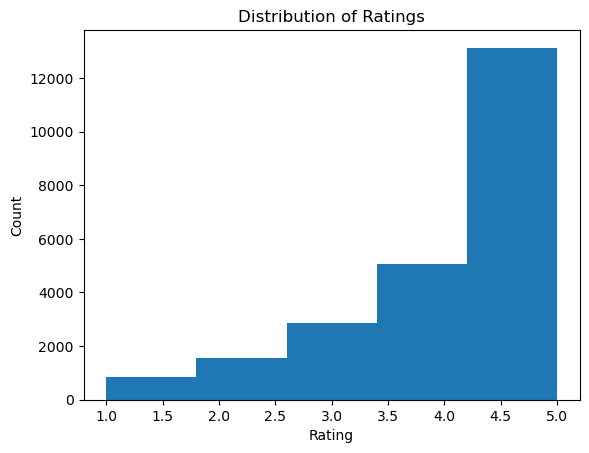

In [12]:
# Calculate basic statistics for Age and Rating columns
age_stats = df['Age'].describe()
rating_stats = df['Rating'].describe()

# Print the statistics
print("Age Statistics:")
print(age_stats)
print("\nRating Statistics:")
print(rating_stats)

# Plot a histogram of ratings
import matplotlib.pyplot as plt

plt.hist(df['Rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# 3. Categorical analysis: Distribution of Division Names and Cross tabulation of department names and class names

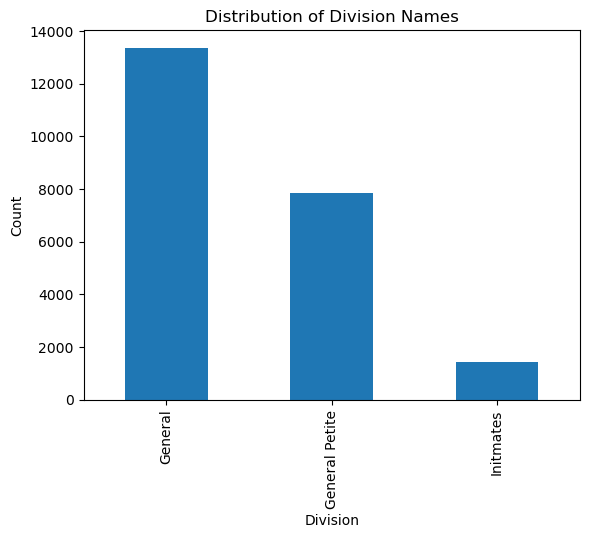

Cross-Tabulation of Department Names and Class Names:
Class Name       Blouses  Casual bottoms  Chemises  Dresses  Fine gauge  \
Department Name                                                           
Bottoms                0               1         0        0           0   
Dresses                0               0         0     6145           0   
Intimate               0               0         1        0           0   
Jackets                0               0         0        0           0   
Tops                2983               0         0        0        1059   
Trend                  0               0         0        0           0   

Class Name       Intimates  Jackets  Jeans  Knits  Layering  Legwear  Lounge  \
Department Name                                                                
Bottoms                  0        0   1104      0         0        0       0   
Dresses                  0        0      0      0         0        0       0   
Intimate               14

In [72]:
# Bar plot of division names
division_counts = df['Division Name'].value_counts()
division_counts.plot(kind='bar')
plt.xlabel('Division')
plt.ylabel('Count')
plt.title('Distribution of Division Names')
plt.show()

# Cross-tabulation of department names and class names
cross_tab = pd.crosstab(df['Department Name'], df['Class Name'])
print("Cross-Tabulation of Department Names and Class Names:")
print(cross_tab)

# 4. Age Distribution by Division and Department:

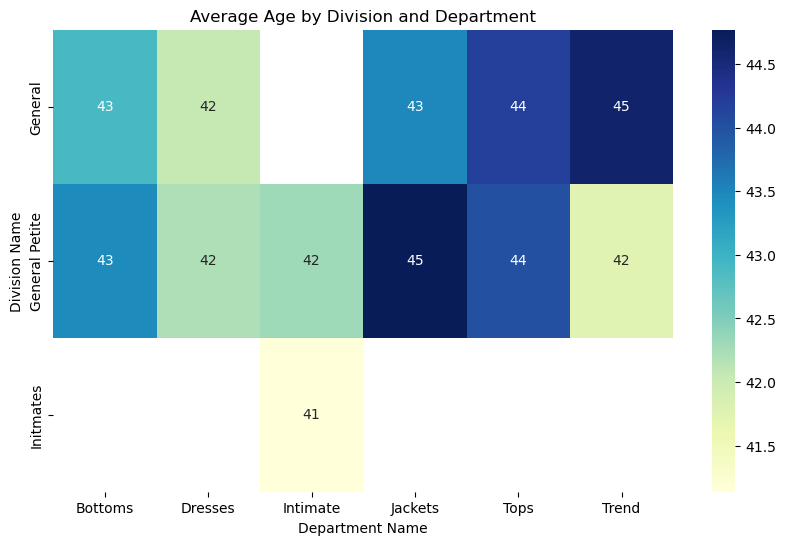

In [22]:
import seaborn as sns

# Group the data by Division and Department and calculate the average age
age_by_div_dept = df.groupby(['Division Name', 'Department Name'])['Age'].mean().reset_index()

# Create a pivot table to display the average age by Division and Department
pivot_age = age_by_div_dept.pivot(index='Division Name', columns='Department Name', values='Age')
#print(pivot_age)
# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_age, annot=True, cmap='YlGnBu')
plt.title('Average Age by Division and Department')
plt.show()


# 5. Rating Distribution by Division and Class Name:

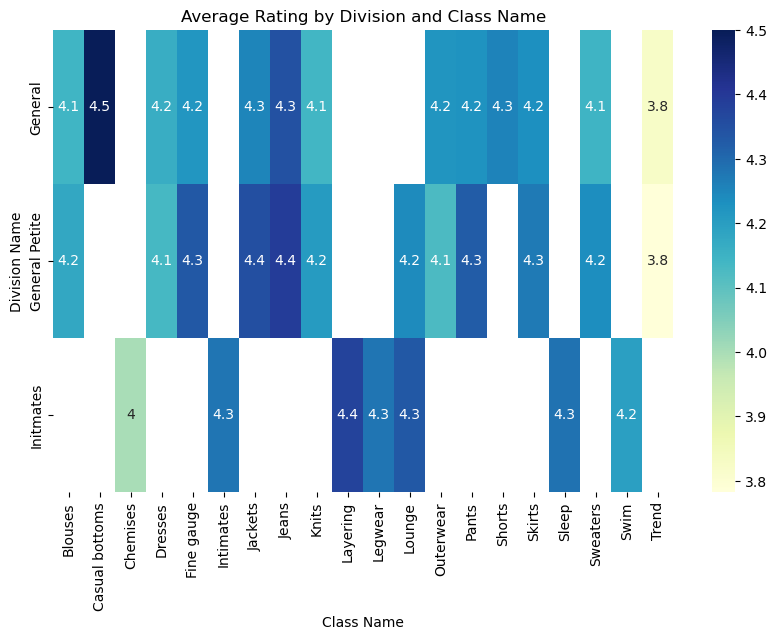

In [23]:
# Create a cross-tabulation of Division and Class Name with Rating as values
rating_cross_tab = pd.crosstab(df['Division Name'], df['Class Name'], values=df['Rating'], aggfunc='mean')

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rating_cross_tab, annot=True, cmap='YlGnBu')
plt.title('Average Rating by Division and Class Name')
plt.show()


# 6. Age distribution by Rating

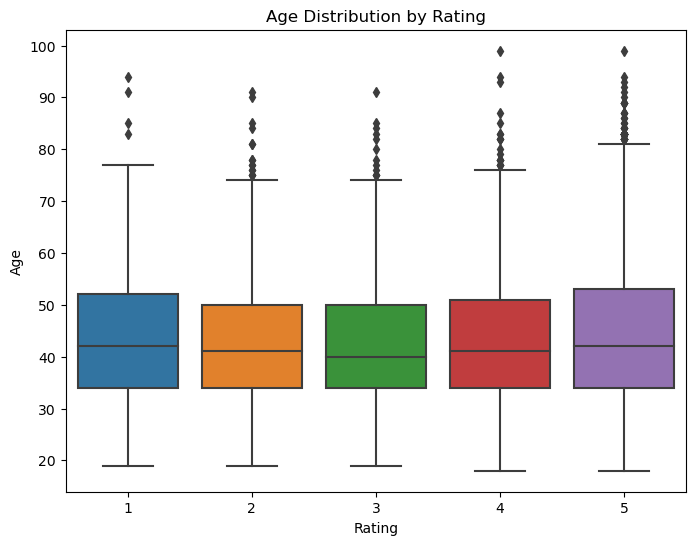

In [49]:
# Plot a boxplot to visualize the distribution of Age by Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'], y=df['Age'])
plt.xlabel('Rating')
plt.ylabel('Age')
plt.title('Age Distribution by Rating')
plt.show()


# 7. Age Group Distribution

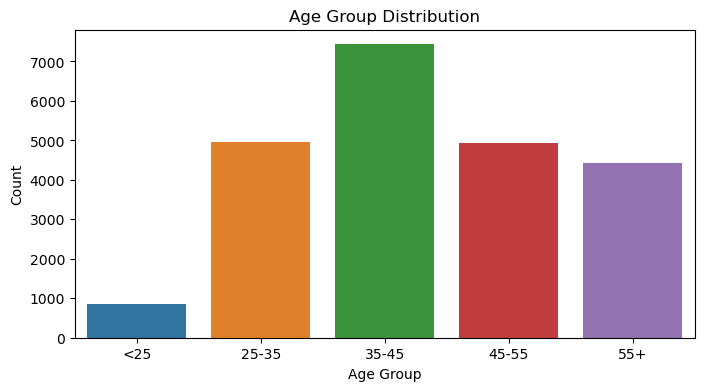

In [80]:
# Create age groups
bins = [0, 25, 35, 45, 55, float('inf')]
labels = ['<25', '25-35', '35-45', '45-55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Countplot of Age Groups
plt.figure(figsize=(8, 4))
sns.countplot(x='Age Group', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

# 8. Distribution of Class Name by Age Group

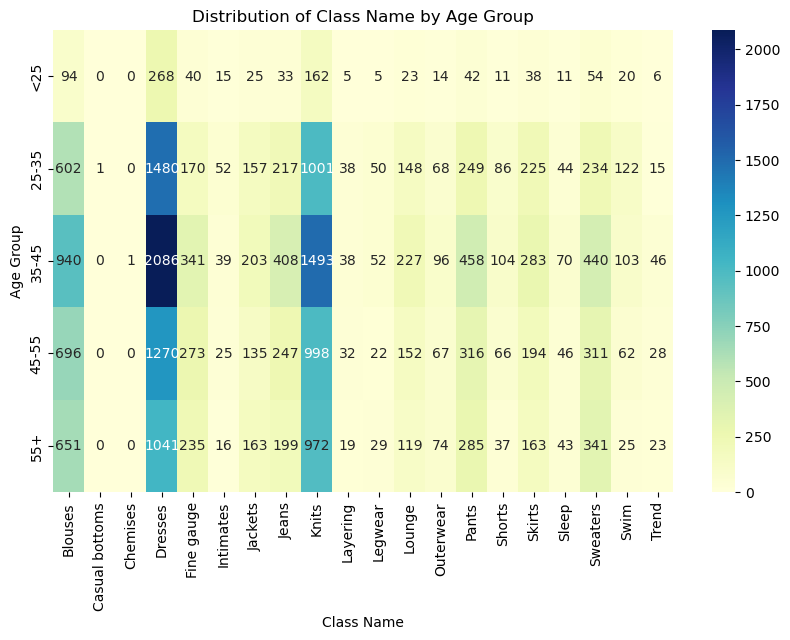

In [59]:
import seaborn as sns

# Create a pivot table of count by Age Group and Class Name
pivot_table = df.pivot_table(index='Age Group', columns='Class Name', aggfunc='size', fill_value=0)

# Plot a heatmap of the count of Class Name by Age Group
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Class Name')
plt.ylabel('Age Group')
plt.title('Distribution of Class Name by Age Group')
plt.show()


# 9. Correlation of Age and Rating

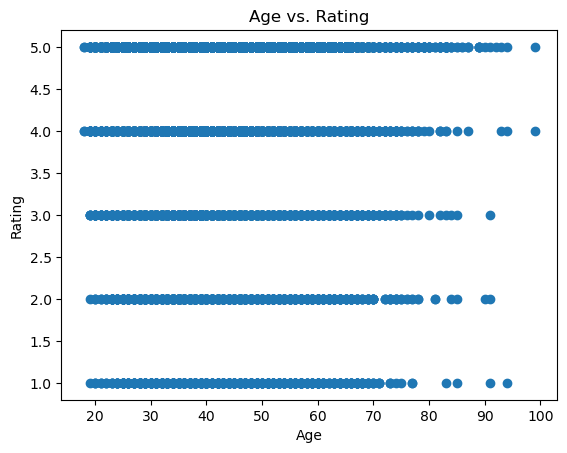

Correlation Matrix:
             Age    Rating
Age     1.000000  0.029962
Rating  0.029962  1.000000


In [71]:
# Scatter plot of Age and Rating
plt.scatter(df['Age'], df['Rating'])
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs. Rating')
plt.show()

# Correlation matrix
corr_matrix = df[['Age', 'Rating']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# 10. Sentiments Analysis

In [61]:
from textblob import TextBlob

# Perform sentiment analysis on review text
df['Sentiment'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral based on polarity threshold
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Print the sentiment analysis results
print(df[['Review Text', 'Sentiment', 'Sentiment Category']].head())


                                         Review Text  Sentiment  \
0  Absolutely wonderful - silky and sexy and comf...   0.633333   
1  Love this dress!  it's sooo pretty.  i happene...   0.339583   
2  I had such high hopes for this dress and reall...   0.073675   
3  I love, love, love this jumpsuit. it's fun, fl...   0.550000   
4  This shirt is very flattering to all due to th...   0.512891   

  Sentiment Category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  


In [62]:
# Filter for negative and neutral sentiments
negative_neutral_sentiments = df[df['Sentiment Category'].isin(['Negative', 'Neutral'])]

# Print the negative and neutral sentiment analysis results
print(negative_neutral_sentiments[['Review Text', 'Sentiment', 'Sentiment Category']].head())

                                          Review Text  Sentiment  \
10  Dress runs small esp where the zipper area run...  -0.097149   
14  This is a nice choice for holiday gatherings. ...  -0.057143   
22  First of all, this is not pullover styling. th...  -0.045595   
28  I have several of goodhyouman shirts and i get...   0.000000   
44  Tried this on today at my local retailer and h...  -0.046374   

   Sentiment Category  
10           Negative  
14           Negative  
22           Negative  
28            Neutral  
44           Negative  


In [63]:
# Count the occurrences of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Calculate the percentage of each sentiment category
sentiment_percentages = (sentiment_counts / len(df)) * 100

# Print the counts and percentages
print("Sentiment Category Counts:")
print(sentiment_counts)
print("\nSentiment Category Percentages:")
print(sentiment_percentages)

Sentiment Category Counts:
Positive    21227
Negative     1322
Neutral        92
Name: Sentiment Category, dtype: int64

Sentiment Category Percentages:
Positive    93.754693
Negative     5.838965
Neutral      0.406342
Name: Sentiment Category, dtype: float64


In [64]:
# Sentiment by age group
sentiment_by_age = df.groupby('Age Group')['Sentiment Category'].value_counts(normalize=True) * 100
print("Sentiment by Age Group:")
print(sentiment_by_age)

Sentiment by Age Group:
Age Group  Sentiment Category
<25        Positive              94.694348
           Negative               4.267589
           Neutral                1.038062
25-35      Positive              93.772672
           Negative               5.925030
           Neutral                0.302297
35-45      Positive              93.461590
           Negative               6.121351
           Neutral                0.417059
45-55      Positive              93.507282
           Negative               6.027508
           Neutral                0.465210
55+        Positive              94.317926
           Negative               5.366404
           Neutral                0.315671
Name: Sentiment Category, dtype: float64


In [65]:
# Sentiment by division name and class name
sentiment_by_division_class = df.groupby(['Division Name', 'Class Name'])['Sentiment Category'].value_counts(normalize=True) * 100
print("\nSentiment by Division Name and Class Name:")
print(sentiment_by_division_class)


Sentiment by Division Name and Class Name:
Division Name  Class Name      Sentiment Category
General        Blouses         Positive               94.450207
                               Negative                5.082988
                               Neutral                 0.466805
               Casual bottoms  Positive              100.000000
               Dresses         Positive               93.810445
                                                        ...    
Initmates      Sleep           Negative                5.607477
                               Neutral                 0.934579
               Swim            Positive               93.674699
                               Negative                5.722892
                               Neutral                 0.602410
Name: Sentiment Category, Length: 86, dtype: float64


# 11. Text analyses: Length of each Review Text and Distribution of Review Length

0         53
1        303
2        500
3        124
4        192
        ... 
23481    131
23482    223
23483    208
23484    427
23485    110
Name: Review Length, Length: 22641, dtype: int64


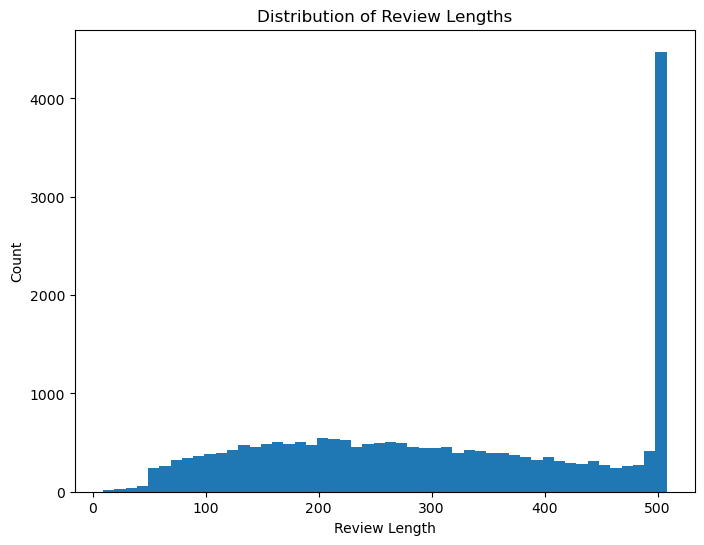

In [74]:
# Calculate the length of each review text
df['Review Length'] = df['Review Text'].apply(len)
print(df['Review Length'])
# Plot a histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(df['Review Length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()

# 12. Text analyses: Word Associations with Reviews:

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Drop rows with missing 'Review Text' values
df = df.dropna(subset=['Review Text'])

# Create a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['Review Text'])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)

# Get the top words for each topic
num_words = 10
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    print(f"Topic {idx + 1}: {', '.join(top_words)}")


Topic 1: like, dress, looked, just, online, store, tried, ordered, look, fabric
Topic 2: size, small, dress, large, fit, medium, chest, ordered, runs, bust
Topic 3: dress, size, fits, flattering, love, fit, fabric, true, beautiful, body
Topic 4: bought, love, size, sale, small, wear, colors, great, store, color
Topic 5: dress, fabric, skirt, like, love, coat, great, lining, material, nice
Topic 6: compliments, dress, wore, love, received, time, comfortable, got, wear, great
Topic 7: shirt, like, love, white, color, cute, tee, little, wear, great
Topic 8: dress, short, petite, length, long, size, regular, love, just, waist
Topic 9: great, love, dress, comfortable, soft, wear, sweater, perfect, fall, jeans
Topic 10: pants, jeans, fit, pair, size, love, great, stretch, shorts, like


# 13. Visualisation

Most Frequent Words:
dress: 10567 occurrences
love: 8951 occurrences
size: 8772 occurrences
fit: 7325 occurrences
like: 7149 occurrences
wear: 6439 occurrences
great: 6117 occurrences
just: 5608 occurrences
fabric: 4798 occurrences
small: 4729 occurrences


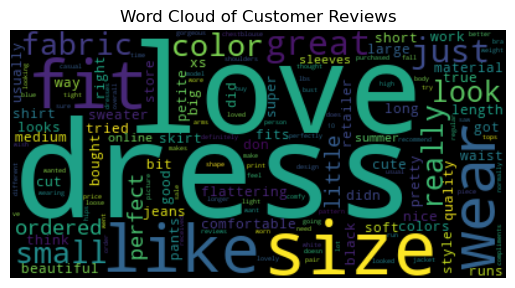

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a word frequency matrix
vectorizer = CountVectorizer(stop_words='english')
word_freq_matrix = vectorizer.fit_transform(df['Review Text'])

# Get the most frequent words
words = vectorizer.get_feature_names_out()
word_counts = word_freq_matrix.sum(axis=0).tolist()[0]
word_freq = dict(zip(words, word_counts))

# Print the most frequent words
print("Most Frequent Words:")
for word, count in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{word}: {count} occurrences")

# Generate a word cloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

In [88]:
# Save final file

df.to_csv(r'C:\Users\hp\Documents\Data-Analytics\Project_portfolio\Python_data\Womens_Clothing_Ecommerce_Reviews.csv', index=False)

In [95]:
wordcloud.to_file(r'C:\Users\hp\Documents\Data-Analytics\Project_portfolio\Python_data\wordCloud.png')